# Flight Price Prediction

#### INTRODUCTION
The objective of the study is to analyze the flight booking dataset obtained from the “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

#### Data Source
JILLANI SOFT TECH. (n.d.). Flight price prediction dataset. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx


In [3]:
train_df = pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx')
test_df = pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx')

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df = pd.concat([train_df,test_df],ignore_index=True)

In [5]:
df.shape

(13354, 11)

In [6]:
cols = list(df.columns)

### Data Preprocessing


#### Missing Values

In [7]:
#missing values
print('Null columns: \n', df.isna().sum())

Null columns: 
 Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64


In [8]:
# there is only 2 rows with missing values. 
# drop missing values
df.dropna(inplace=True)

#### Duplicated values

In [9]:
# check for duplication in train & test data
print('Number of duplicated values in train data: ',df.duplicated().sum())
print('Number of duplicated values in test data: ',df.duplicated().sum())

Number of duplicated values in train data:  220
Number of duplicated values in test data:  220


In [10]:
# drop duplication in train & test data
df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

### Feature Engineering
convert column Date_of_Journey, arrival_time, duration from string type to datetime, hour

In [11]:
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute


In [12]:
date_cols_to_drop = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
df.drop(date_cols_to_drop, axis = 1, inplace = True)

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35


In [13]:
df['Duration_Hour'] = df['Duration'].str[:2]
df['Duration_Hour'] = df['Duration_Hour'].str.replace('h','')
df['Duration_Hour'] = df['Duration_Hour'].str.strip().replace('5m','0')
df['Duration_Hour'] = pd.to_numeric(df['Duration_Hour'])

print(df['Duration_Hour'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_Hour, Length: 10462, dtype: int64


In [14]:
df['Duration_Min'] = df['Duration'].str[3:]
df['Duration_Min'] = df['Duration_Min'].str.strip().replace('','0')
df['Duration_Min'] = df['Duration_Min'].str.replace('m','')
df['Duration_Min'] = pd.to_numeric(df['Duration_Min'])

print(df['Duration_Min'])

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_Min, Length: 10462, dtype: int64


In [15]:
df.drop('Duration', axis = 1, inplace = True)

### Check for unique values

In [16]:
df['Additional_Info'].nunique()

10

In [17]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [18]:
df['Additional_Info'] = df['Additional_Info'].str.replace('No info', 'No Info')

### Visualization

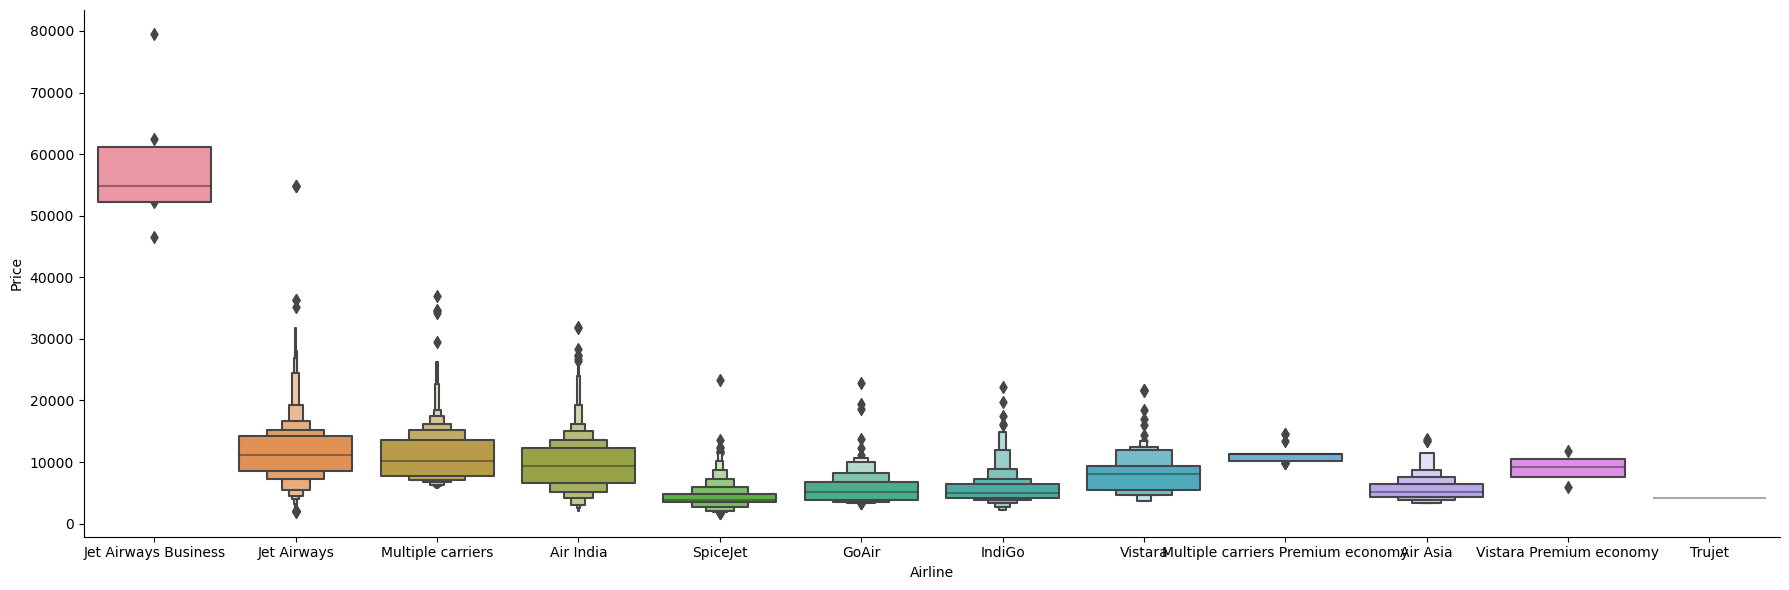

In [19]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

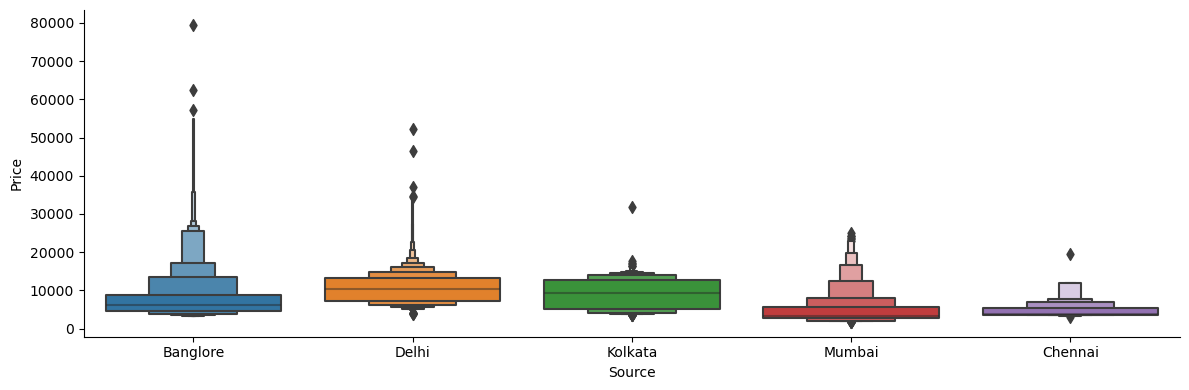

In [20]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

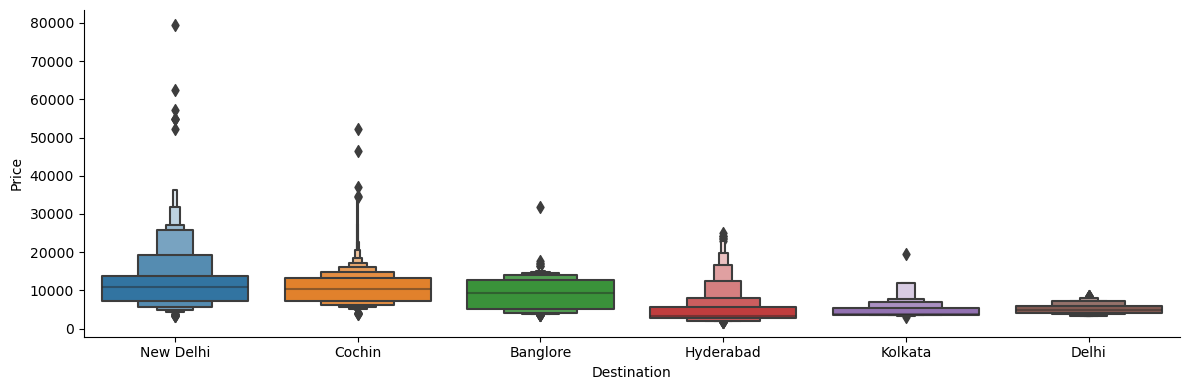

In [21]:
# Destination vs Price

sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### Check for outliers & Remove them with IQR

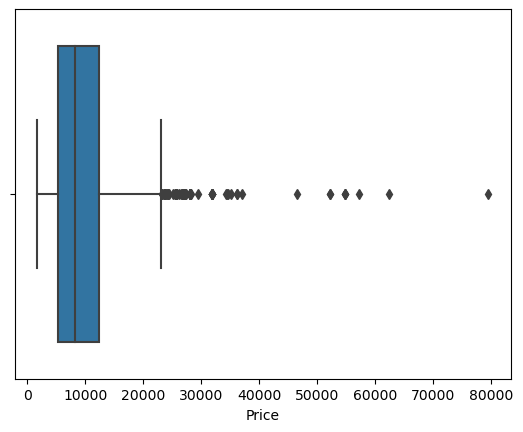

In [22]:
sns.boxplot(x= 'Price', data=df);

In [23]:
# remove outliers with IQR

q1,q3 = np.percentile(df['Price'],[25,75])
print(q1,q3)
iqr = q3 - q1
print('\nq1, q3 =', q1, q3)
threshold = 1.5
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(outliers)

# total number of outliers
print(len(outliers))

# remove outliers
df=df.drop(outliers.index)

5224.0 12344.75

q1, q3 = 5224.0 12344.75
                    Airline    Source Destination                  Route  \
123               Air India     Delhi      Cochin        DEL → BOM → COK   
396       Multiple carriers     Delhi      Cochin        DEL → BOM → COK   
486             Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
510             Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
597               Air India    Mumbai   Hyderabad  BOM → JDH → DEL → HYD   
...                     ...       ...         ...                    ...   
10353           Jet Airways    Mumbai   Hyderabad  BOM → BDQ → DEL → HYD   
10364  Jet Airways Business  Banglore   New Delhi        BLR → MAA → DEL   
10383           Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
10439           Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
10511             Air India  Banglore   New Delhi  BLR → BOM → BHO → DEL   

      Total_Stops Additional_Info    Price  J

### Handling Categorical Data


In [24]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No Info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No Info,13302.0,1,3,16,50,21,35,4,45


In [25]:
# Route and Total_Stops are related to each other
df.drop(["Route"], axis = 1, inplace = True)

# Label Encoding
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [26]:
nominal_cols = ['Airline', 'Source', 'Destination', 'Additional_Info']

# These are nominal categorical data so we perform one-hot encoding

for col in nominal_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df = df.drop(col, axis=1)

In [27]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,1,0,0,0,1,0,0
1,2,7662.0,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,1,0,0
2,2,13882.0,9,6,9,25,4,25,19,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,1,0,0
4,1,13302.0,1,3,16,50,21,35,4,45,...,0,0,0,1,0,0,0,1,0,0


### Feature Selection

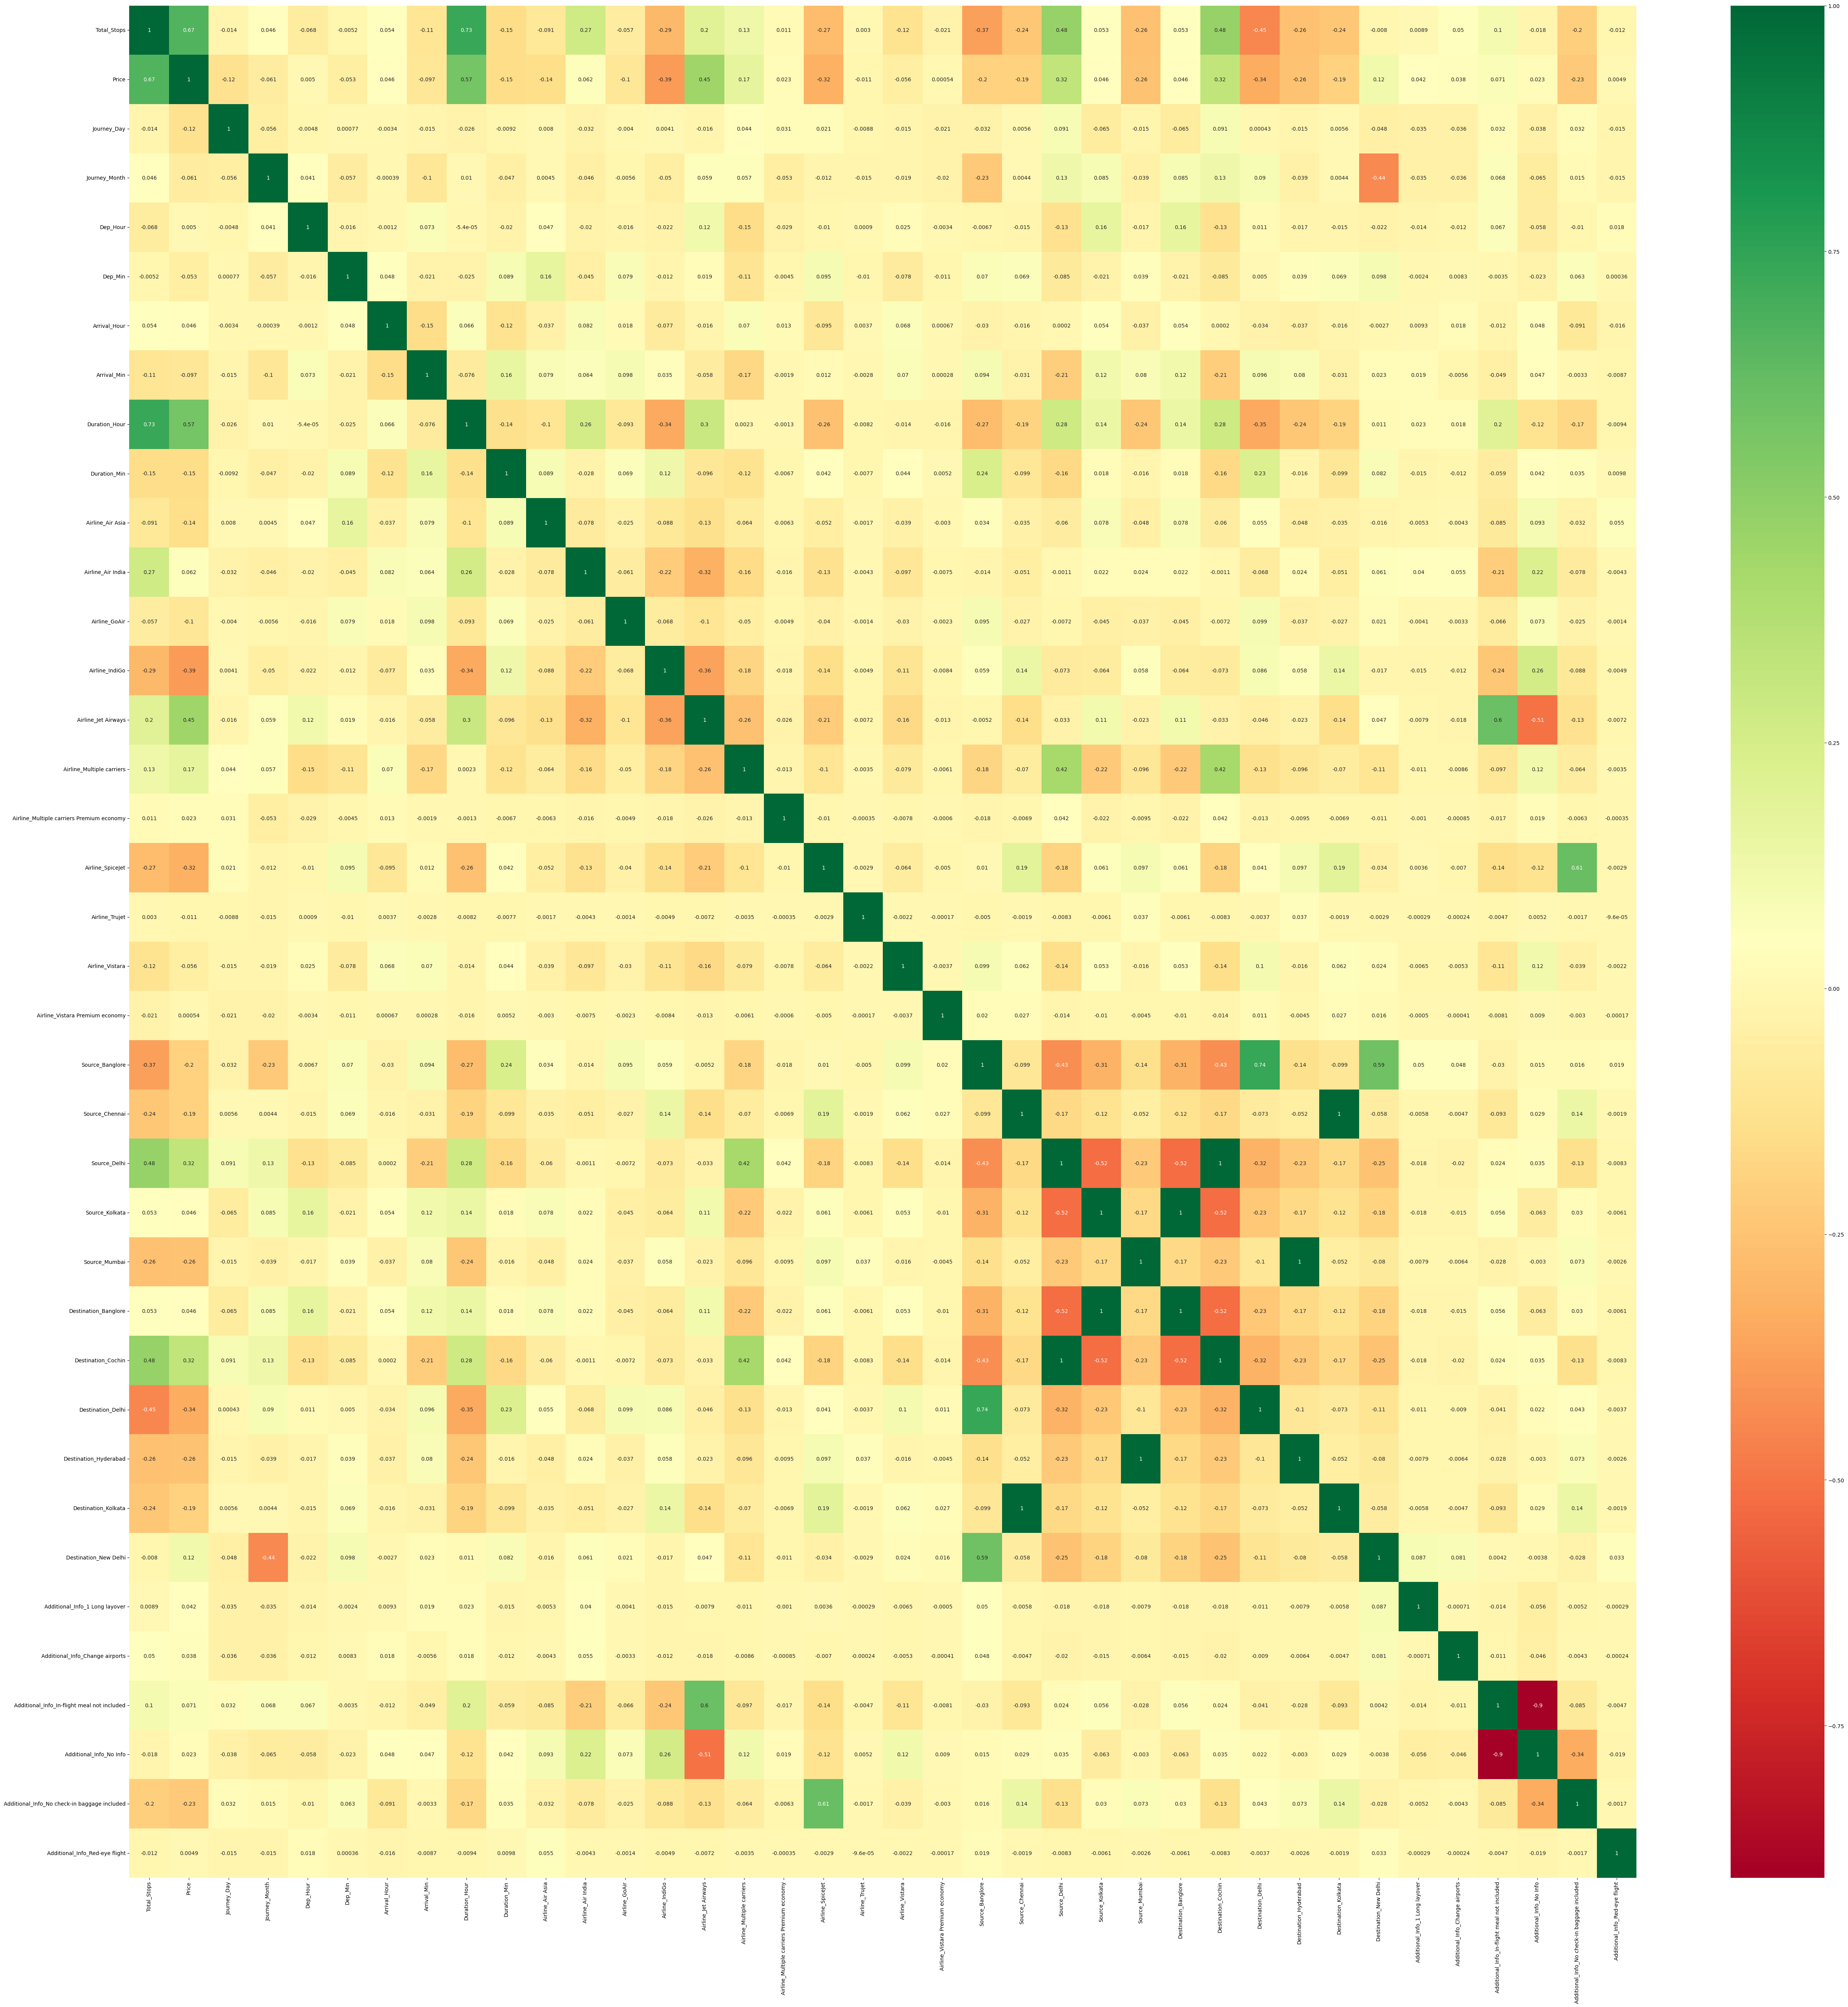

In [28]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (64,64))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Fitting Model
* Linear Regression
* Random Tree
* XGBoost

In [29]:
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop('Price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn import metrics

def model_evaluation(model):
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    #plot scatter graph
    plt.scatter(y_test, y_pred, alpha = 0.5)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show() 
    print('r2 score for training: ',model.score(X_train, y_train))
    print('r2: ', metrics.r2_score(y_test, y_pred))
    print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=10,
                       learning_rate=0.01)
reg_rf = RandomForestRegressor()
reg_lr = LinearRegression()

[10:55:32] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


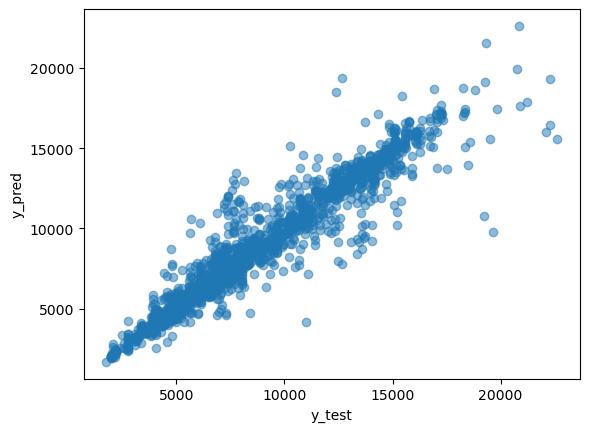

r2 score for training:  0.9879500557307527
r2:  0.9253664652419303
MAE:  608.284020831293
MSE:  1211491.2603992657
RMSE:  1100.6776369124912


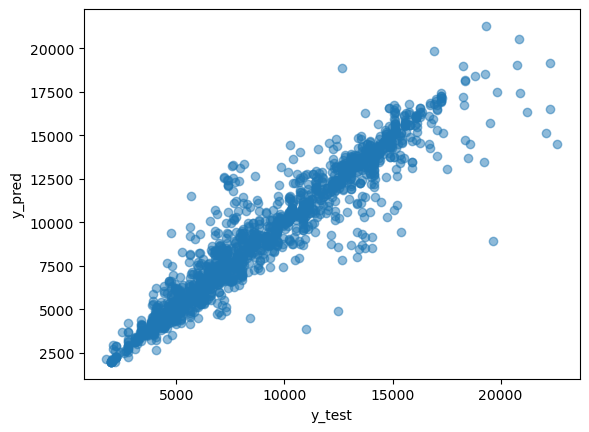

r2 score for training:  0.9858145456692863
r2:  0.917397060741321
MAE:  621.8191048525968
MSE:  1340854.8760228823
RMSE:  1157.9528816074005


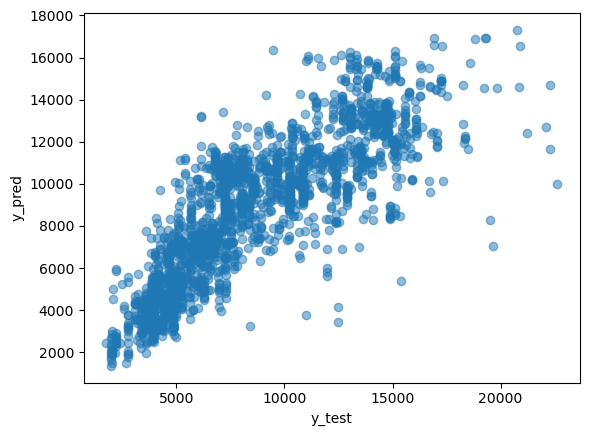

r2 score for training:  0.7118354346397512
r2:  0.6989350601109863
MAE:  1648.2129573119032
MSE:  4887046.348139546
RMSE:  2210.6664941007148


In [50]:
models= [xgb, reg_rf, reg_lr]
for model in models:
    model_evaluation(model)

**XGBoost performs slightly better than Random Tree Regressor**

### Export Model

In [56]:
import joblib
joblib.dump(xgb,'flight_fare_xgb.pkl')

['flight_fare_xgb.pkl']